# Naive Baye
### Naive Bayes is a probabilistic supervised learning algorithm that applies Bayes' theorem to classify data points by calculating the probability of each class given the input features, assuming independence between them. It shines in classification tasks (e.g., distinguishing spam from ham emails based on word frequencies) and can be adapted for text or numerical data, requiring minimal training beyond estimating class probabilities. The algorithm assumes that features are conditionally independent given the class, which simplifies computation but may not hold perfectly in real-world scenarios like email content. Its strength lies in its efficiency and effectiveness with high-dimensional data (e.g., text), but it can struggle with correlated features and requires careful preprocessing for optimal performance.

### Use Naive Bayes as a quick prototype for projects, with adjustments to feature engineering (e.g., text tokenization) to enhance accuracy, especially for deployment in real-time email filtering systems.


| Aspect | Details |
| :- | :- |
| Use For           | Classification (e.g., spam email detection, sentiment analysis)<br>Can be extended to numerical data with Gaussian Naive Bayes |
| Key Assumptions   | - Conditional independence of features given the class<br>- Independent observations<br>- Sufficient data for probability estimation |
| Advantages        | - Highly efficient with minimal training time<br>- Effective for high-dimensional data (e.g., text)<br>- Interpretable probability outputs |
| Disadvantages     | - Sensitive to feature correlations<br>- Requires careful preprocessing (e.g., text normalization)<br>- Struggles with small datasets |
| Avoid When        | - Datasets with strong feature dependencies<br>- Very small samples with limited class representation<br>- Need for complex model relationships |
| Real-World Use Case | Spam email detection (e.g., classifying emails as spam or ham based on word patterns)<br>Sentiment analysis (e.g., determining positive/negative reviews) |

## Problem Description: 
### Predict the quality of red wine (rated from 0 to 10) based on physicochemical properties like alcohol content, pH, and volatile acidity. 

Using Kaggle dataset https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
project_dir = './08_naive_bayes'

# load  dataset
data = pd.read_csv(project_dir + '/data/winequality-red.csv')
print("Dataset loaded, shape:", data.shape)

# feature engineering: add total acidity - to increase accuracy
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity'] + data['citric acid']

# select relevant features and target 
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 
            'total_acidity']
X = data[features]
y = data['quality']  
print("Features shape:", X.shape, "Target shape:", y.shape)

# scale features to improve model performance.
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

Dataset loaded, shape: (1599, 12)
Features shape: (1599, 12) Target shape: (1599,)


In [3]:
# split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, "Test set shape:", X_test.shape)

Train set shape: (1279, 12) Test set shape: (320, 12)


In [4]:
# train the Naive Bayes model (Gaussian assumption for continuous features)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [5]:
# predict and evaluate the model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.53
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 1  2  6  1  0  0]
 [ 0  1 88 37  4  0]
 [ 0  5 44 57 24  2]
 [ 0  0  1 18 23  0]
 [ 0  0  0  1  4  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.20      0.22        10
           5       0.63      0.68      0.65       130
           6       0.50      0.43      0.46       132
           7       0.42      0.55      0.47        42
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.52      0.53      0.53       320



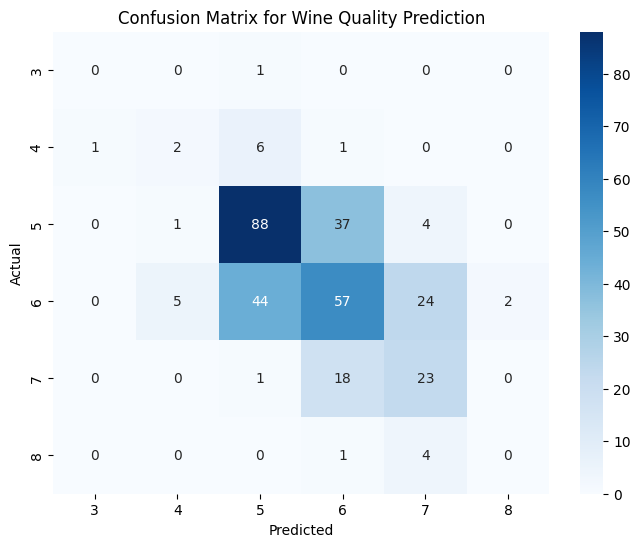

In [6]:
# visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.show()

In [7]:
# save the trained model2 to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
model_filename = os.path.join(model_dir, 'wine_quality_nb_model.pkl')
joblib.dump(nb_model, model_filename)
print(f'Model saved as {model_filename}')

Model saved as ./08_naive_bayes/model/wine_quality_nb_model.pkl


In [8]:
# load the model and run a prediction test
loaded_model = joblib.load(model_filename)
sample_data = pd.DataFrame(
    [[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 8.1]],
    columns=features
)
sample_input_scaled = scaler.transform(sample_data)  # Scale the DataFrame
sample_prediction = loaded_model.predict(sample_input_scaled)
print(f'Predicted Wine Quality for sample input: {sample_prediction[0]}')

Predicted Wine Quality for sample input: 5


/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
